In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## import the dataset. Change the file path as needed
df = pd.read_excel(r"C:\Users\Daniel.Lang\Downloads\Park Typology Dataset 3.xlsx")

## change numerical columns to text values
df.rename(columns={2012: '2012', 2016:'2016', 2019:'2019', 2022:'2022'},
    inplace=True)
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Setting,2012,2016,2019,2022,Jan-19,Feb-19,...,Total Parking Area (Acres),Miles of Road/Acre,Acre of Parking/Acre,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,rural,169515,252495,238226,265707,1939,6534,...,1.503191,0.002441,0.004363,0,0,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,rural,2431052,3303393,3437286,3970260,8532,9154,...,40.037856,0.001938,0.000816,1,414808,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,urban,336031,199301,187400,12848,27,179,...,0.000000,0.000000,0.000000,1,0,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,urban,77624,46526,47427,29743,96,1571,...,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,rural,11824,15555,16657,16357,0,94,...,1.922567,0.001270,0.000629,0,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# extract variables of interest by column number
voi = df.iloc[:, [0,1,7, 35]]
voi.head()

,NPS Full Name,Simplified Name,2022,Road Length in Park (Mi)
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,265707,0.841
1,Acadia National Park,Acadia,3970260,95.109
2,Adams National Historical Park,Adams,12848,0.000
3,African Burial Ground National Monument,African Burial Ground,29743,0.000
4,Agate Fossil Beds National Monument,Agate Fossil Beds,16357,3.882


In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
## choose columns to run the analysis on
data_columns = ['2022','Road Length in Park (Mi)']  
data = voi[data_columns]
## scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
## make clusters
agg_clustering = AgglomerativeClustering(n_clusters=10)  
labels = agg_clustering.fit_predict(data_scaled)
print(labels)

[6 3 6 6 6 6 6 6 7 6 6 6 6 6 6 7 6 6 4 6 7 7 6 6 6 3 3 6 7 7 7 7 6 5 6 6 6
 6 4 6 4 6 7 7 6 4 6 7 7 4 3 6 7 7 6 6 6 6 6 7 4 6 7 6 6 6 6 6 6 4 4 7 7 6
 6 6 6 4 7 6 6 6 9 7 7 6 9 4 6 6 0 0 7 6 6 9 6 7 6 6 6 6 6 6 6 3 6 6 6 6 6
 6 6 6 6 6 6 6 6 7 6 6 7 6 6 6 6 6 6 6 6 7 6 6 4 6 6 7 6 6 7 8 6 6 6 6 6 8
 7 6 6 3 3 1 6 6 3 6 3 6 6 7 1 6 7 6 4 6 9 6 6 6 6 9 6 6 6 6 6 6 4 6 6 4 4
 6 6 6 6 6 7 6 6 6 6 3 6 6 6 6 6 7 6 7 6 6 6 6 4 6 6 0 7 9 7 7 6 6 6 8 6 7
 6 6 6 6 6 6 7 7 6 6 6 4 6 6 6 6 9 6 7 6 9 6 0 6 6 6 6 3 4 7 6 2 7 7 6 6 6
 6 6 3 6 6 6 6 6 9 6 6 3 6 9 7 6 6 6 6 7 6 6 6 6 7 6 7 6 6 6 6 3 6 6 7 7 6
 6 6 6 7 6 6 6 4 3 6 6 7 6 6 7 6 7 6 6 6 6 6 7 4 7 7 6 7 6 6 6 9 3 7 6 7 6
 4 6 6 7 6 6 6 6 6 6 7 6 4 6 6 7 6 6 6 6 6 6 6 6 6 4 6 7 4 7 6 6 6 6 6 6 6
 7 6 7 6 6 6 7 6 6 7 4 6 6 7 2 0 6 3]


In [5]:
## append lapels to original dataset
voi['Cluster_Labels'] = labels
voi.head()

C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_34232\2214654142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voi['Cluster_Labels'] = labels


,NPS Full Name,Simplified Name,2022,Road Length in Park (Mi),Cluster_Labels
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,265707,0.841,6
1,Acadia National Park,Acadia,3970260,95.109,3
2,Adams National Historical Park,Adams,12848,0.000,6
3,African Burial Ground National Monument,African Burial Ground,29743,0.000,6
4,Agate Fossil Beds National Monument,Agate Fossil Beds,16357,3.882,6


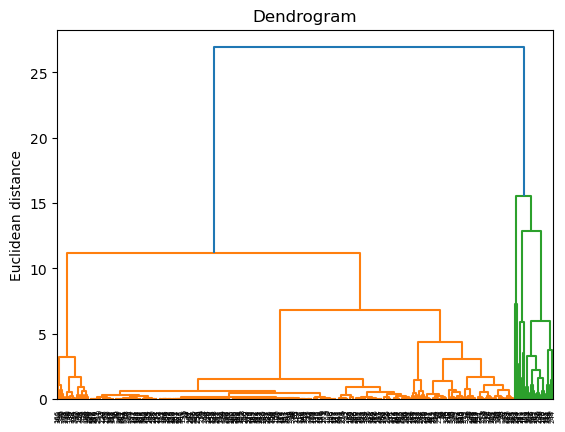

In [6]:
from scipy.cluster.hierarchy import dendrogram , linkage
## Calculate Z (Euclidean Distance)
Z = linkage(data_scaled, method = 'ward')

## (Plot Dendrogram)
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [7]:
# Get and sort unique cluster labels
unique_clusters = sorted(voi['Cluster_Labels'].unique())

# Loop through each cluster and print the count
for cluster_label in unique_clusters:
    cluster_length = len(voi.loc[voi['Cluster_Labels'] == cluster_label])
    print(f"{cluster_length} in cluster {cluster_label}")

5 in cluster 0
2 in cluster 1
2 in cluster 2
17 in cluster 3
25 in cluster 4
1 in cluster 5
252 in cluster 6
70 in cluster 7
3 in cluster 8
11 in cluster 9


In [8]:
## find the largest cluster
max_cluster = voi['Cluster_Labels'].value_counts().idxmax()

# Extract rows with the max_cluster value into a new DataFrame
second_sort = voi[voi['Cluster_Labels'] == max_cluster]
second_sort.head()

,NPS Full Name,Simplified Name,2022,Road Length in Park (Mi),Cluster_Labels
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,265707,0.841,6
2,Adams National Historical Park,Adams,12848,0.000,6
3,African Burial Ground National Monument,African Burial Ground,29743,0.000,6
4,Agate Fossil Beds National Monument,Agate Fossil Beds,16357,3.882,6
5,Alagnak Wild River,Alagnak Wild,184,0.000,6


In [9]:
## choose columns to run the second analysis on
data_columns = ['2022','Road Length in Park (Mi)']  
data = second_sort[data_columns]
## scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
## make clusters
agg_clustering = AgglomerativeClustering(n_clusters=10)  
labels = agg_clustering.fit_predict(data_scaled)
print(labels)

[8 2 2 3 2 3 7 3 2 2 7 8 2 3 1 2 2 2 2 2 4 2 2 1 2 2 2 2 2 2 5 9 6 2 9 6 2
 7 2 1 2 2 7 9 9 2 8 5 0 2 9 8 0 1 9 2 2 3 8 2 2 2 2 1 2 4 3 1 2 1 2 4 8 3
 2 8 0 1 0 2 9 2 1 2 2 1 3 2 2 3 2 5 9 9 5 2 3 6 3 2 9 2 4 3 1 2 2 2 6 2 9
 5 2 3 3 3 2 2 2 2 0 5 2 8 2 2 5 3 1 2 2 6 2 0 1 3 2 2 2 0 9 8 0 9 2 8 3 8
 2 2 5 2 8 2 2 2 2 9 7 5 1 2 0 2 2 7 2 2 2 1 2 5 9 2 1 5 3 6 8 8 7 2 2 9 0
 0 4 2 2 8 2 2 1 2 2 2 0 2 8 2 2 2 9 2 2 3 1 2 2 2 7 2 5 9 2 9 6 7 2 2 2 2
 8 2 2 8 2 2 2 2 2 9 2 8 7 1 0 9 5 1 8 2 2 0 2 2 0 1 2 2 1 2]


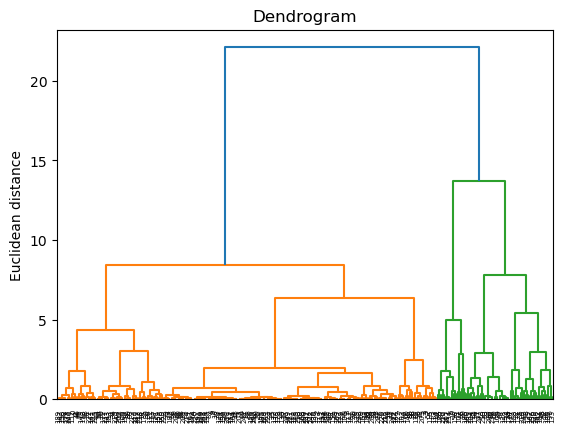

In [10]:
## Calculate Z (Euclidean Distance)
Z = linkage(data_scaled, method = 'ward')

## Plot Dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [11]:
second_sort['Cluster_Labels2'] = labels
second_sort.head()

C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_34232\725244384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_sort['Cluster_Labels2'] = labels


,NPS Full Name,Simplified Name,2022,Road Length in Park (Mi),Cluster_Labels,Cluster_Labels2
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,265707,0.841,6,8
2,Adams National Historical Park,Adams,12848,0.000,6,2
3,African Burial Ground National Monument,African Burial Ground,29743,0.000,6,2
4,Agate Fossil Beds National Monument,Agate Fossil Beds,16357,3.882,6,3
5,Alagnak Wild River,Alagnak Wild,184,0.000,6,2


In [12]:
# Get and sort unique cluster labels
unique_clusters = sorted(second_sort['Cluster_Labels2'].unique())

# Loop through each cluster and print the count
for cluster_label in unique_clusters:
    cluster_length = len(second_sort.loc[second_sort['Cluster_Labels2'] == cluster_label])
    print(f"{cluster_length} in cluster {cluster_label}")

15 in cluster 0
22 in cluster 1
119 in cluster 2
20 in cluster 3
5 in cluster 4
13 in cluster 5
7 in cluster 6
10 in cluster 7
20 in cluster 8
21 in cluster 9


In [13]:
voi = voi.merge(second_sort[['NPS Full Name','Cluster_Labels2']], on='NPS Full Name', how='left', suffixes=('', '_second_sort'))
voi['Cluster_Labels2'] = voi['Cluster_Labels2'].fillna(999)
voi['Cluster_Labels2'] = voi['Cluster_Labels2'].astype(int)
voi.head()

,NPS Full Name,Simplified Name,2022,Road Length in Park (Mi),Cluster_Labels,Cluster_Labels2
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,265707,0.841,6,8
1,Acadia National Park,Acadia,3970260,95.109,3,999
2,Adams National Historical Park,Adams,12848,0.000,6,2
3,African Burial Ground National Monument,African Burial Ground,29743,0.000,6,2
4,Agate Fossil Beds National Monument,Agate Fossil Beds,16357,3.882,6,3


In [16]:
grouped = voi.groupby('Cluster_Labels2')['Simplified Name'].unique()

for cluster_label, names in grouped.items():
    print(f"Cluster {cluster_label}: {', '.join(names)}")

Cluster 0: Cowpens, Devils Postpile, Fort Necessity, Fort Raleigh, Jean Lafitte, Kings Mountain, Lewis and Clark, Little Bighorn Battlefield, Morristown, Petersburg, Petroglyph, Richmond, Voyageurs, White House, Wilson's Creek
Cluster 1: Arlington House, Boston African American, Channel Islands, Devils Tower, Fire Island, Ford's Theatre, Fort Caroline, Fort Pulaski, Fort Sumter and Fort Moultrie, Fort Washington, Guilford Courthouse, Kaloko-Honokohau, Klondike Gold Rush, Montezuma Castle, Nez Perce, Obed, Pu'uhonua o Honaunau, Salem Maritime, Vanderbilt Mansion, War in the Pacific, Wolf Trap, Wright Brothers
Cluster 2: Adams, African Burial Ground, Alagnak Wild, Andrew Johnson, Aniakchak, Appomattox Court House, Aztec Ruins, Belmont-Paul Women's Equality, Bent's Old Fort, Bering Land Bridge, Big Hole, Bluestone, Booker T. Washington, Boston Harbor Islands, Brown v. Board of Education, Buck Island Reef, Camp Nelson, Cane River Creole, Cape Krusenstern, Carter G. Woodson Home, César E. C

In [ ]:
data_columns = ['2022','Road Length in Park (Mi)']  
data = voi[data_columns]

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=10)  
labels = agg_clustering.fit_predict(data)

In [ ]:
voi['Cluster_Labels_US'] = labels

In [ ]:
voi.head()

In [ ]:
# Get and sort unique cluster labels
unique_clusters = sorted(voi['Cluster_Labels_US'].unique())

# Loop through each cluster and print the count
for cluster_label in unique_clusters:
    cluster_length = len(voi.loc[voi['Cluster_Labels_US'] == cluster_label])
    print(f"{cluster_length} in cluster {cluster_label}")

In [ ]:
Z = linkage(data, method = 'ward')

In [ ]:
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()